In [1]:
##Elghazi_soufiane

import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

1 Girvan Newman

In [2]:
## return the edge to remove

def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True): ### Sort by value
      edge = key
      break

  return edge
## girvan newman using edge_to_remove

def girvan_newman(graph):
# find number of connected components

    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

2 Zachary Karate Club

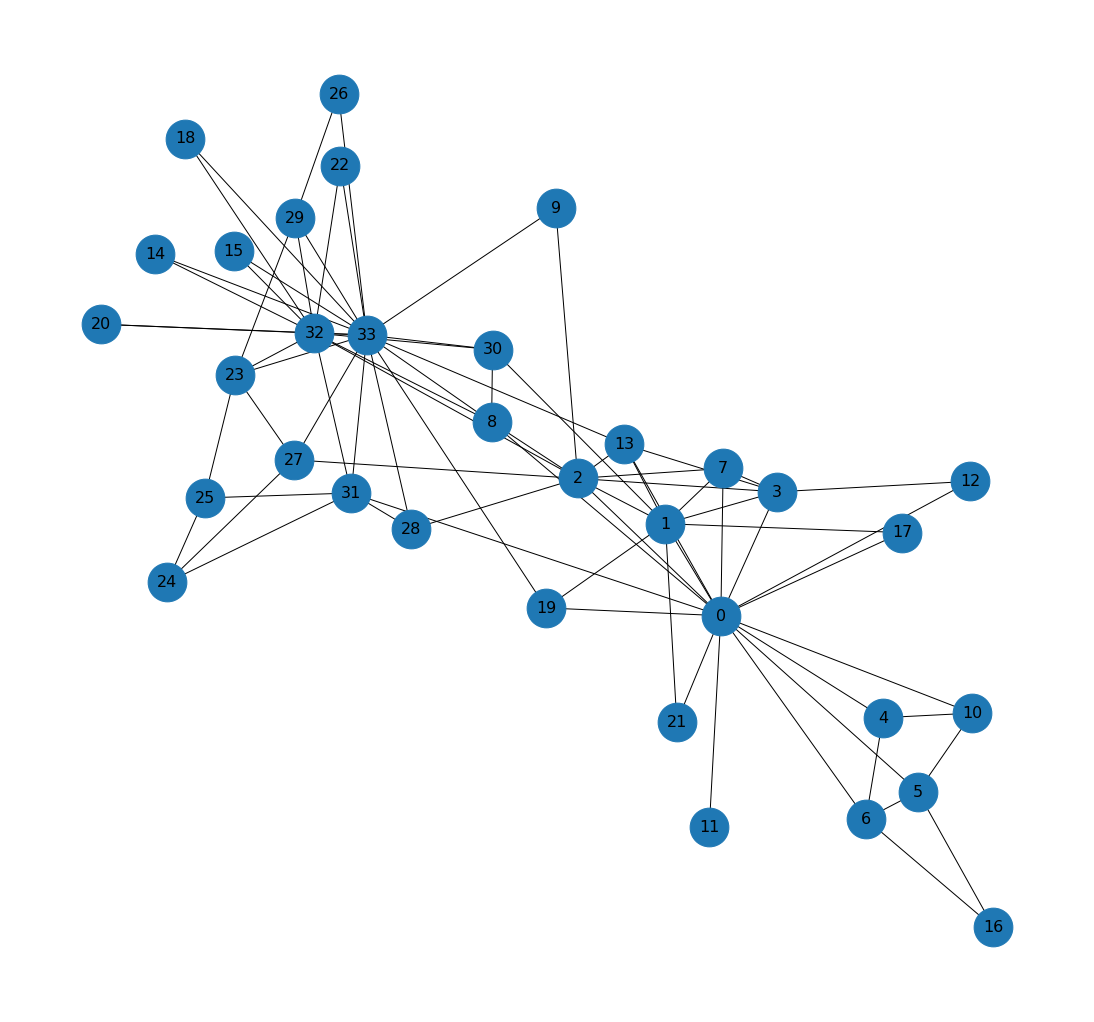

In [3]:
## Question 1
G = nx.karate_club_graph()

# visualize the graph
plt.figure(figsize=(15,14)) 
nx.draw(G, with_labels=True,node_size = 1500 ,arrowsize = 23, font_size =16)

In [4]:
len(G.nodes), len(G.edges)


(34, 78)

In [5]:
# question 2
G=nx.karate_club_graph()

nx.degree_centrality(G)
nx.closeness_centrality(G)
nx.betweenness_centrality(G)

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

In [6]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

In [7]:
node_groups

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

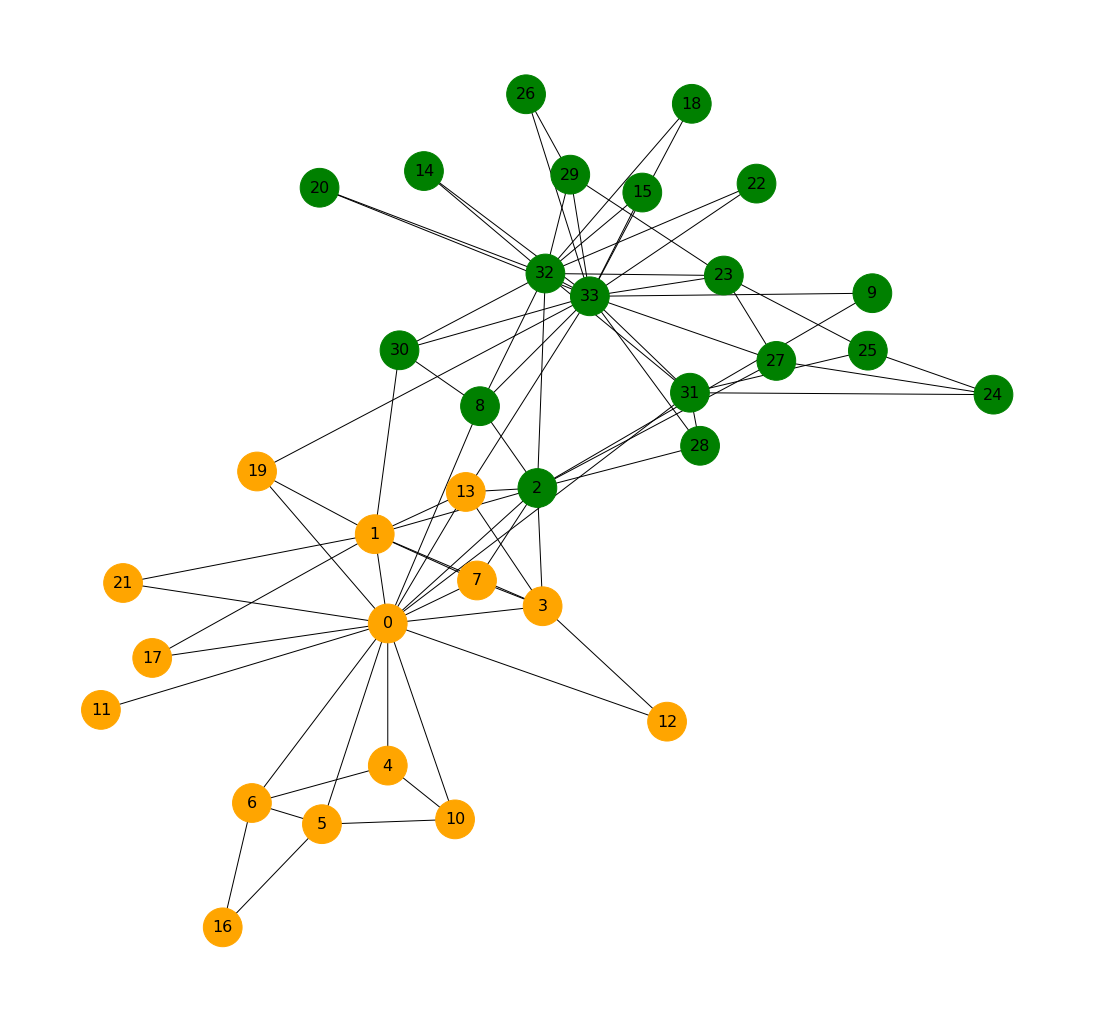

In [8]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('orange')
    else: 
        color_map.append('green')  

plt.figure(figsize=(15,14))        
nx.draw(G, node_color=color_map, with_labels=True,node_size = 1500 ,arrowsize = 23, font_size =16)
plt.show()